## plot batch vs best value

number exceed initial best 6
ABC_T/round1 last group mean 1.4579896814776876
ABC_T/round1 max_value: 2.2714190519437194


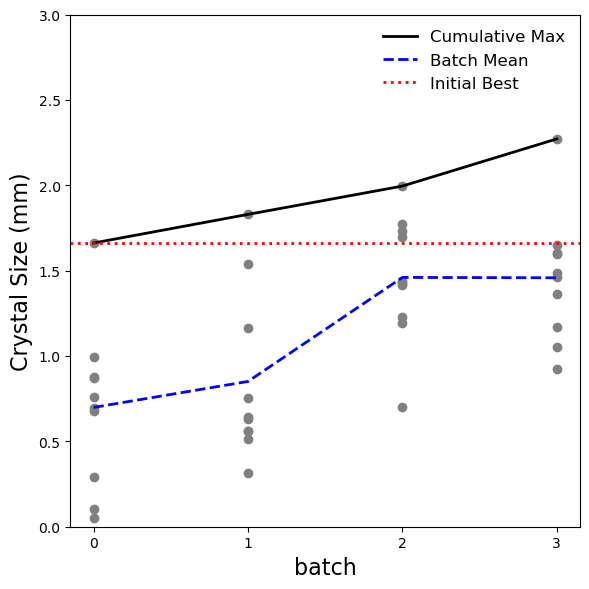

number exceed initial best 5
ABC_T/round2 last group mean 1.3220296561408935
ABC_T/round2 max_value: 1.942130149848368


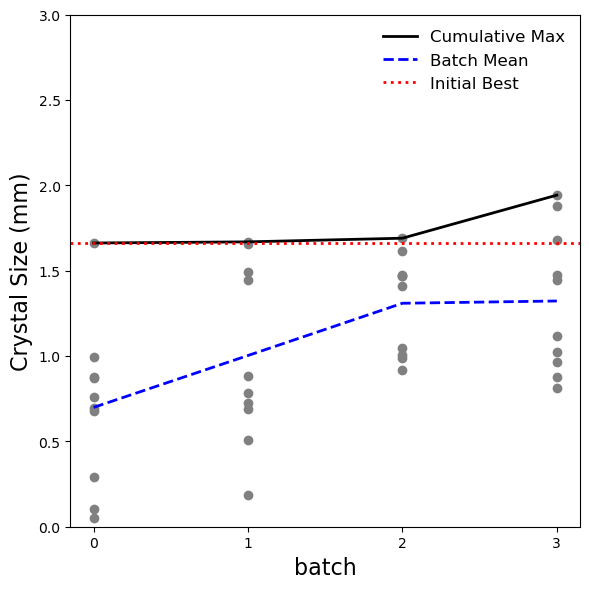

number exceed initial best 4
ABC_T/round3 last group mean 1.0415339500598706
ABC_T/round3 max_value: 1.9545839344895384


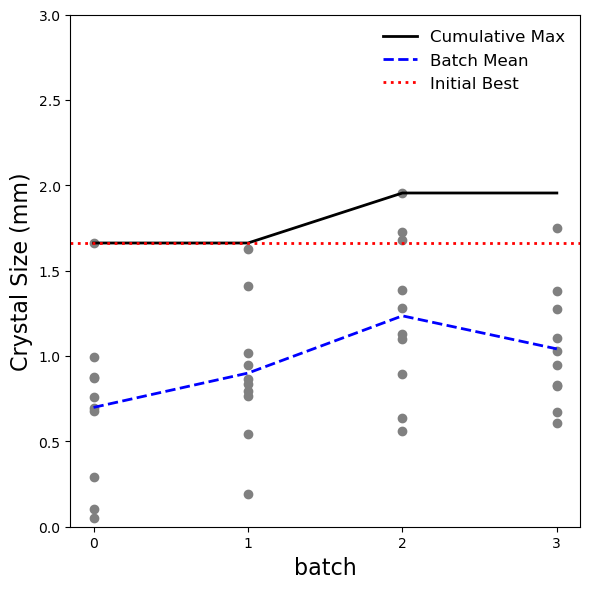

number exceed initial best 7
ABC_T/round4 last group mean 1.524951762856622
ABC_T/round4 max_value: 1.999659831634744


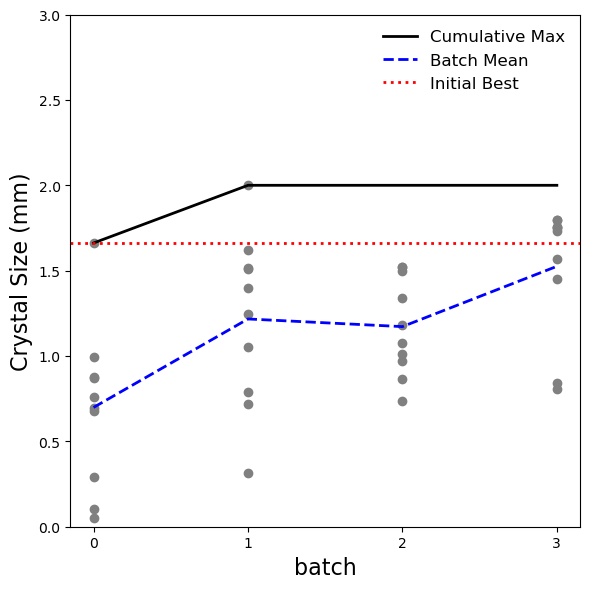

number exceed initial best 4
ABC_T/round5 last group mean 1.0757707859810073
ABC_T/round5 max_value: 1.820467878070818


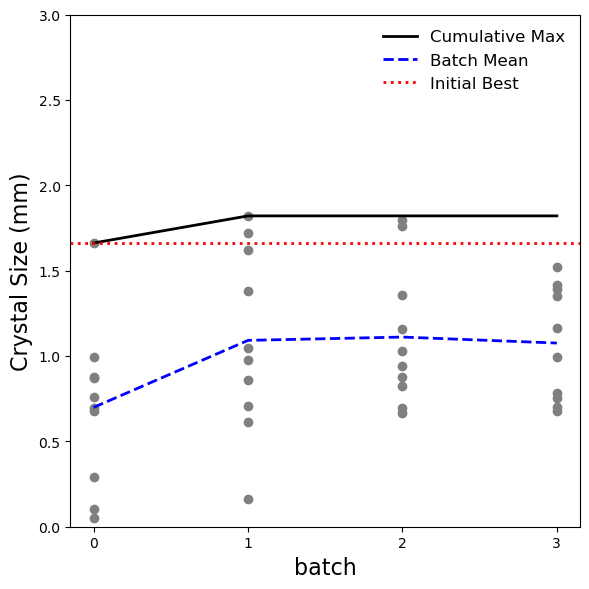

number exceed initial best 5
ABC_T/round6 last group mean 1.2819580456653352
ABC_T/round6 max_value: 1.9864933013680992


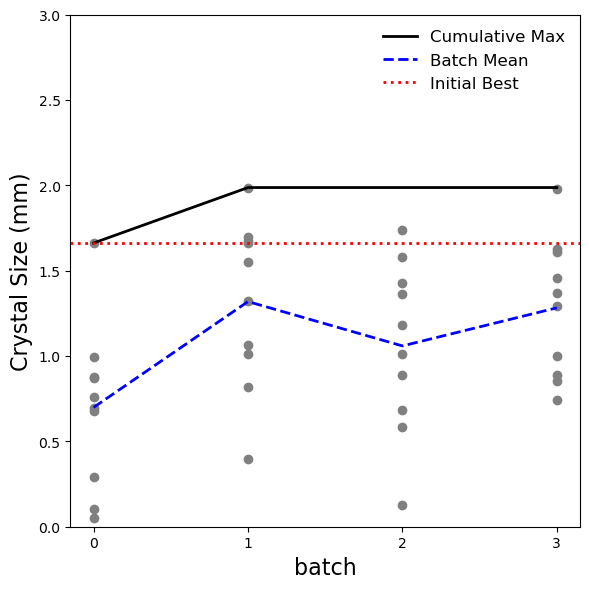

number exceed initial best 3
ABC_T/round7 last group mean 1.3756062849430049
ABC_T/round7 max_value: 1.9303018501520688


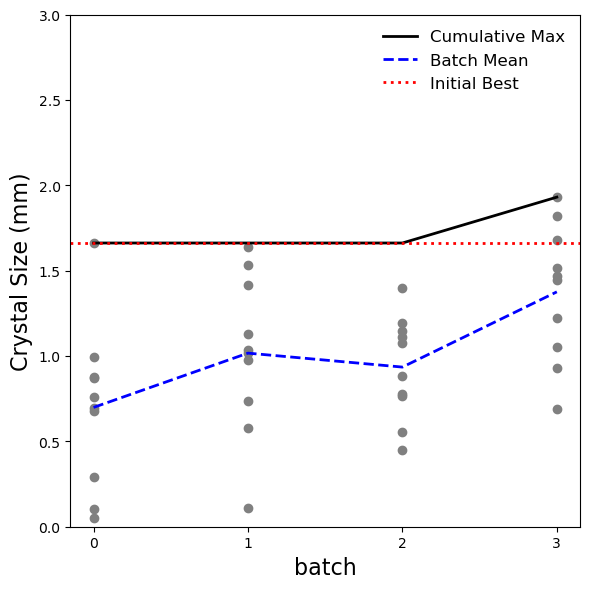

number exceed initial best 8
ABC_T/round8 last group mean 1.330245497444347
ABC_T/round8 max_value: 2.059667793650292


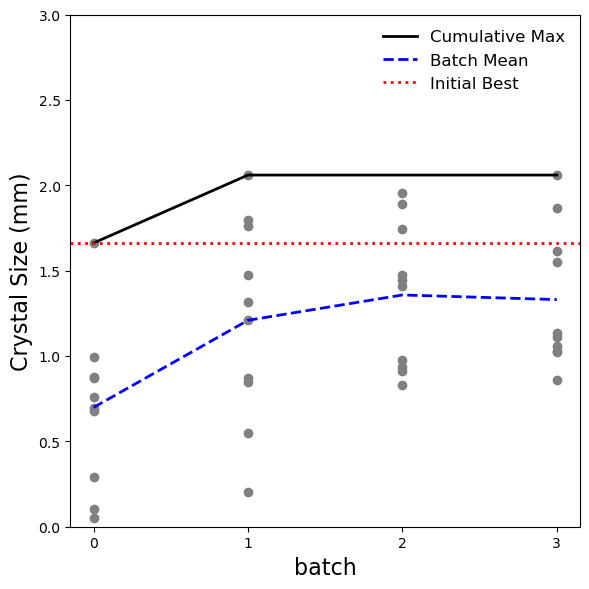

number exceed initial best 11
ABC_T/round9 last group mean 1.5482273789518826
ABC_T/round9 max_value: 2.097563118207876


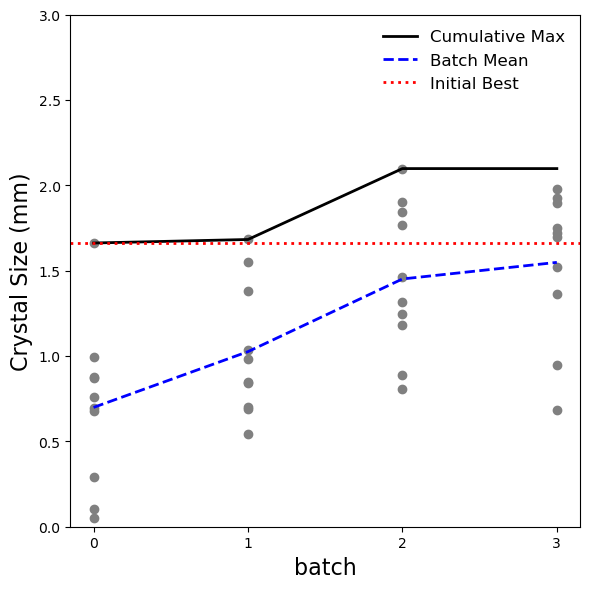

number exceed initial best 14
ABC_T/round10 last group mean 1.667332506028422
ABC_T/round10 max_value: 2.1139785245219938


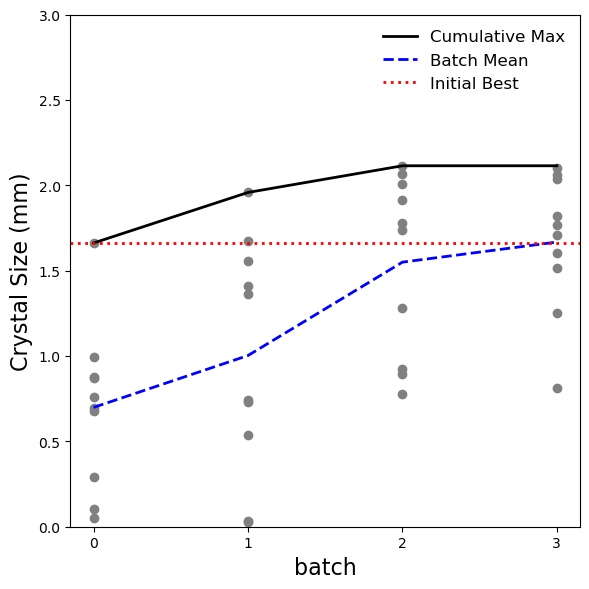

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

methods = ['ABC', 'PSO','Random','PSO-re']
methods = ['PSO/round1','PSO/round2','PSO/round3','PSO/round4','PSO/round5','PSO/round6', 'PSO/round7', 'PSO/round8', 'PSO/round9', 'PSO/round10']
methods = ['Random/round1','Random/round2','Random/round3','Random/round4','Random/round5','Random/round6', 'Random/round7', 'Random/round8', 'Random/round9', 'Random/round10']
methods = ['PSO-re/round1', 'PSO-re/round2', 'PSO-re/round3', 'PSO-re/round4',  'PSO-re/round5',
'PSO-re/round6', 'PSO-re/round7', 'PSO-re/round8', 'PSO-re/round9',  'PSO-re/round10']

methods = ['ABC_T/round1', 'ABC_T/round2','ABC_T/round3', 'ABC_T/round4', 'ABC_T/round5',
            'ABC_T/round6', 'ABC_T/round7', 'ABC_T/round8', 'ABC_T/round9', 'ABC_T/round10']

#methods = ['ABC_T/round1', 'ABC_T/round2','ABC_T/round3']



#methods = ['ABC_T','PSO']
for method in methods:
    # 讀取 CSV
    df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/{method}/cycle3.csv')  # 替換成你的檔案路徑

    # 檢查欄位
    if 'crystal_size' not in df.columns:
        raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")


    # 分組
    group_size = 10
    groups = [df['crystal_size'][i:i+group_size].values for i in range(0, len(df), group_size)]
    group_mean = [sum(g)/len(g) for g in groups]

    initial_best = max(groups[0])
    print('number exceed initial best', (df['crystal_size']>initial_best).sum())

    print(method, 'last group mean', group_mean[-1])
    num_groups = len(groups)

    # 計算每組最大值，以及歷史最大值
    group_max = [max(g) for g in groups]
    cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]

    print(method, 'max_value:', max(cumulative_max))

    # 繪圖
    plt.figure(figsize=(6, 6))
 
    # 畫出每組的散點點位
    for i, group in enumerate(groups):
        x = [i] * len(group)
        plt.scatter(x, group, color='grey')

    # 畫出歷史最大值折線
    plt.plot(range(num_groups), cumulative_max, color='black', linewidth=2, label='Cumulative Max')
    # 畫出平均值折線
    plt.plot(range(num_groups), group_mean, color='blue', linewidth=2, linestyle='--', label='Batch Mean')

    initial_best = group_max[0]  # 第一組的最大 crystal_size
    plt.axhline(y=initial_best, color='red', linestyle=':', linewidth=2, label='Initial Best')

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # 強制整數刻度
    ax.set_ylim(0,3.0)
    # 圖表設定
    plt.xlabel('batch', fontsize=16)
    plt.ylabel('Crystal Size (mm)', fontsize=16)
    #plt.title(method)
    plt.legend(frameon=False, fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


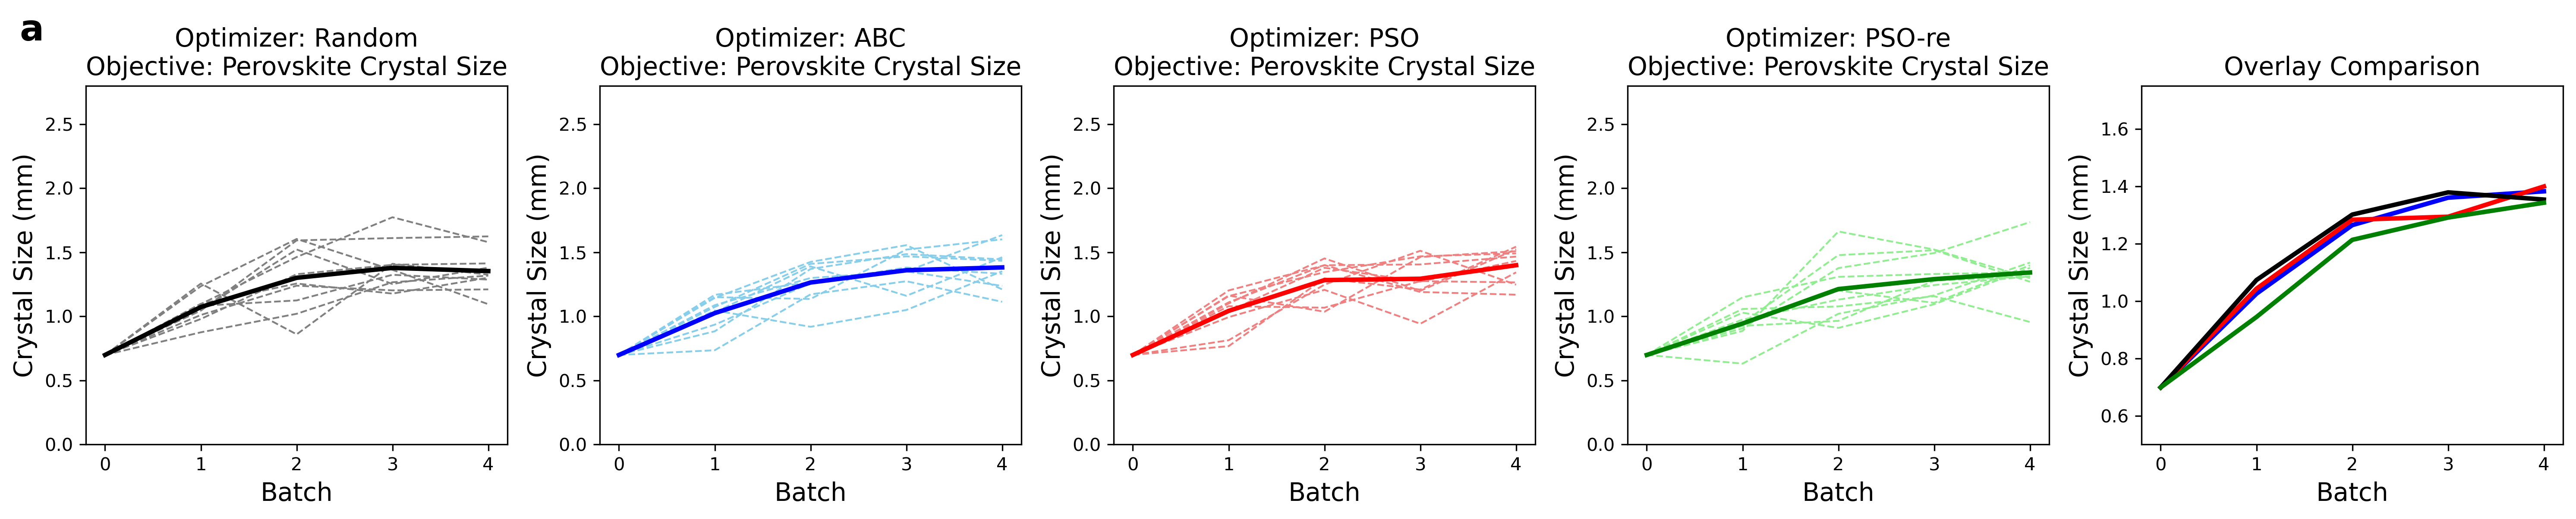

In [2]:
# 5 cycles mean
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

methods = ['ABC','PSO','Random','PSO-re']
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']
seq = {'ABC':1, 'PSO':2,'Random':0, 'PSO-re':3}

#methods = ['ABC']
meann = {}

color = {'ABC':'skyblue', 'PSO':'lightcoral','Random':'grey', 'PSO-re':'lightgreen'}
colorr = {'ABC':'blue', 'PSO':'red','Random':'black', 'PSO-re':'green'}

fig, axs = plt.subplots(1, 5, figsize=(20, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    mean = {}
    for roundn in rounds:
        # 讀取 CSV
        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/{method}/{roundn}/cycle4.csv')  # 替換成你的檔案路徑

        # 檢查欄位
        if 'crystal_size' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

        # 分組
        group_size = 10
        groups = [df['crystal_size'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_mean = [sum(g)/len(g) for g in groups]
        mean[roundn] = group_mean

    meann[method] = mean
    # 將所有 list 轉成 numpy array
    all_lists = np.array(list(mean.values()))  # shape: (5, n)

    x = np.arange(0, all_lists.shape[1])

    # 畫出每條虛線（較淺的顏色）
    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])

    # 計算平均值並畫出粗線
    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)

    # 加上標籤與圖例

    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Perovskite Crystal Size', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Crystal Size (mm)', fontsize = 14)
    axs[seq[method]].set_ylim(0,2.8)


dict1 = meann['ABC']
dict2 = meann['PSO']
dict3 = meann['Random']
dict4 = meann['PSO-re']

# 將 dictionary 轉為 numpy array
arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))
arr4 = np.array(list(dict4.values()))

x = np.arange(0, arr1.shape[1])


# 平均線（深藍色與深紅色）
mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)
mean4 = np.mean(arr4, axis=0)


axs[4].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[4].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[4].plot(x, mean3, color='black', linewidth=2.5, label='Random')
axs[4].plot(x, mean4, color='green', linewidth=2.5, label='PSO-re')

fig.text(0.01, 0.99, 'a', fontsize=20, fontweight='bold',
         va='top', ha='left')

# 加標籤、圖例、標題
plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Crystal Size (mm)', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(0.5,1.75)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/mean/overall.jpeg')
plt.show()

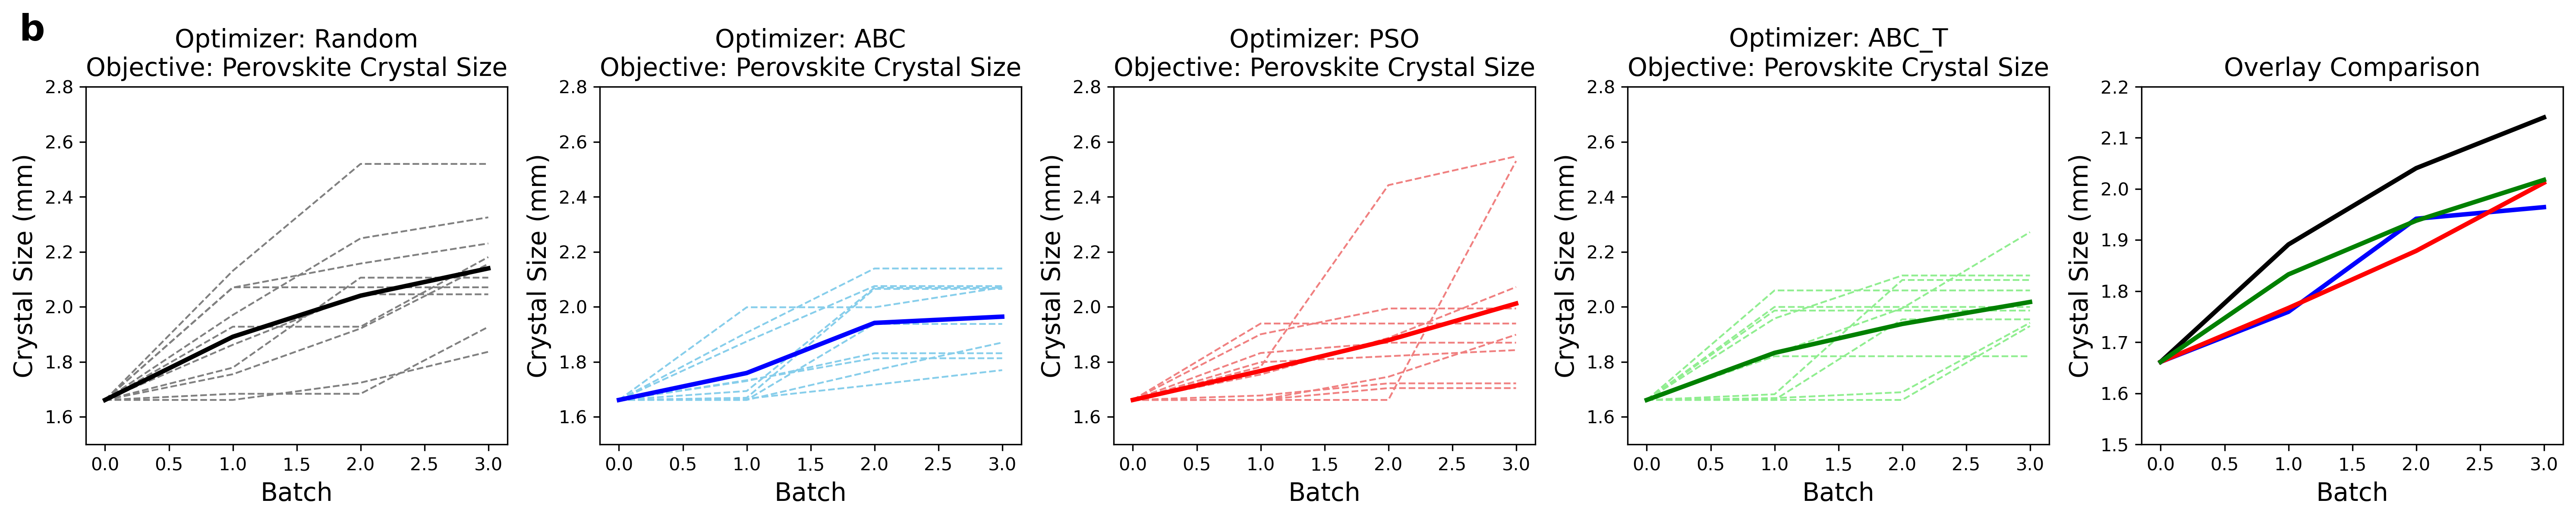

In [3]:
# 5 cycles best
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
methods = ['ABC','PSO','Random']
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']


bestnn = {}

methods = ['ABC','PSO','Random','ABC_T']
seq = {'ABC':1, 'PSO':2,'Random':0,'ABC_T':3}

color = {'ABC':'skyblue', 'PSO':'lightcoral','Random':'grey', 'ABC_T':'lightgreen'}
colorr = {'ABC':'blue', 'PSO':'red','Random':'black', 'ABC_T':'green'}

fig, axs = plt.subplots(1, 5, figsize=(20, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    best = {}
    for roundn in rounds:
        # 讀取 CSV
        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/{method}/{roundn}/cycle3.csv')  # 替換成你的檔案路徑

        # 檢查欄位
        if 'crystal_size' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

        # 分組
        group_size = 10
        groups = [df['crystal_size'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_max = [max(g) for g in groups]
        cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]
        best[roundn] = cumulative_max
        
    bestnn[method] = best    
    # 將所有 list 轉成 numpy array
    all_lists = np.array(list(best.values()))  # shape: (5, n)

    # x 軸
    x = np.arange(0, all_lists.shape[1])

    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])

    # 計算平均值並畫出粗線
    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)

    # 加上標籤與圖例

    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Perovskite Crystal Size', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Crystal Size (mm)', fontsize = 14)
    axs[seq[method]].set_ylim(1.5,2.8)

dict1 = bestnn['ABC']
dict2 = bestnn['PSO']
dict3 = bestnn['Random']
dcit4 = bestnn['ABC_T']

max_ABC = np.array([v[-1] for v in dict1.values()])
max_PSO = np.array([v[-1] for v in dict2.values()])
max_Random = np.array([v[-1] for v in dict3.values()])

# 將 dictionary 轉為 numpy array
arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))
arr4 = np.array(list(dcit4.values()))

x = np.arange(0, arr1.shape[1])

# 平均線（深藍色與深紅色）
mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)
mean4 = np.mean(arr4, axis=0)

axs[4].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[4].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[4].plot(x, mean3, color='black', linewidth=2.5, label='Random')
axs[4].plot(x, mean4, color='green', linewidth=2.5, label='ABC_T')

fig.text(0.01, 0.99, 'b', fontsize=20, fontweight='bold',
         va='top', ha='left')

# 加標籤、圖例、標題
plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Crystal Size (mm)', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(1.5, 2.2)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/best/overall.jpeg')
plt.show()


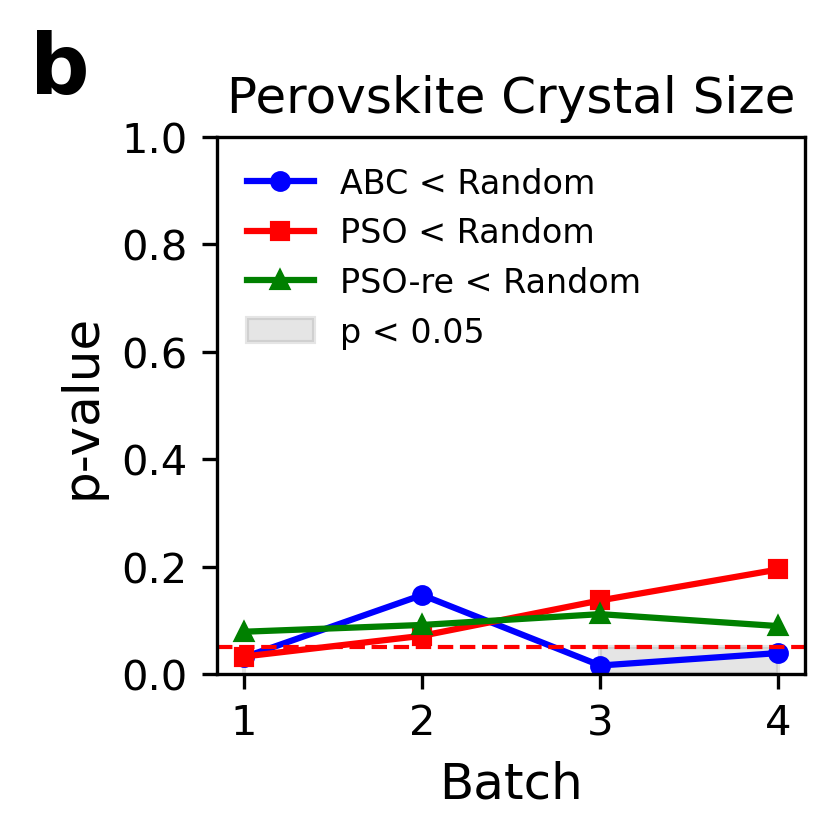

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

n_batch = 4 # 只看前 4 batch

# ====== 計算每 batch 的 p-value ======
pvals_1vs2 = []
pvals_1vs3 = []
pvals_1vs4 = []

for i in range(n_batch):
    # arr1 vs arr2
    t_stat_12, p_val_12 = ttest_ind(arr3[:, i+1], arr1[:, i+1], equal_var=False)
    pvals_1vs2.append(p_val_12 / 2)
    
    # arr1 vs arr3
    t_stat_13, p_val_13 = ttest_ind(arr3[:, i+1], arr2[:, i+1], equal_var=False)
    pvals_1vs3.append(p_val_13 / 2)

    # arr1 vs arr4
    t_stat_14, p_val_14 = ttest_ind(arr3[:, i+1], arr4[:, i+1], equal_var=False)
    pvals_1vs4.append(p_val_14 / 2)


pvals_1vs2 = np.array(pvals_1vs2)
pvals_1vs3 = np.array(pvals_1vs3)
pvals_1vs4 = np.array(pvals_1vs4)

# ====== 繪圖 ======
x = np.arange(1, n_batch + 1)

plt.figure(figsize=(3, 3),dpi = 300)

# 畫兩條線
plt.plot(x, pvals_1vs2, label='ABC < Random', color='blue', marker='o', markersize=4)
plt.plot(x, pvals_1vs3, label='PSO < Random', color='red', marker='s', markersize=4)
plt.plot(x, pvals_1vs4, label='PSO-re < Random', color='green', marker='^', markersize=4)

# 畫虛線
plt.axhline(0.05, color='red', linestyle='--', linewidth=1)

# 顯示 p < 0.05 的區域（任一組顯著就顯示）
sig_mask = (pvals_1vs2 < 0.05) | (pvals_1vs3 < 0.05)
plt.fill_between(x, 0, 0.05, where=sig_mask, color='gray', alpha=0.2, label='p < 0.05')

plt.text(-0.2, 1.2, 'b', fontsize=20, fontweight='bold',
         va='top', ha='left')

plt.xlabel('Batch', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.title('Perovskite Crystal Size', fontsize=12)
plt.ylim(0, 1)
plt.xticks(x)
plt.legend(frameon = False, fontsize = 8, loc='upper left')
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/best_pvalue.jpeg')
plt.show()


In [5]:
from scipy.stats import ttest_ind

t_stat, p_value_two_tailed = ttest_ind(max_PSO, max_Random, equal_var=False)

print(max_PSO)
print(max_Random)
# 將雙尾 p-value 轉成單尾
if t_stat > 0:
    p_value = p_value_two_tailed / 2
else:
    p_value = 1 - p_value_two_tailed / 2

print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")


[2.01920863 2.07209571 2.12828473 1.96955992 2.30922721 2.52990312
 2.54698664 1.72195251 1.84282908 1.76385153]
[2.32528544 2.18086608 2.13902032 2.04558001 2.07105679 2.15591294
 2.14760292 2.01386473 2.23040537 2.51940546]
T-statistic: -0.8892
One-tailed p-value: 0.8052


## exceeds initial best analysis

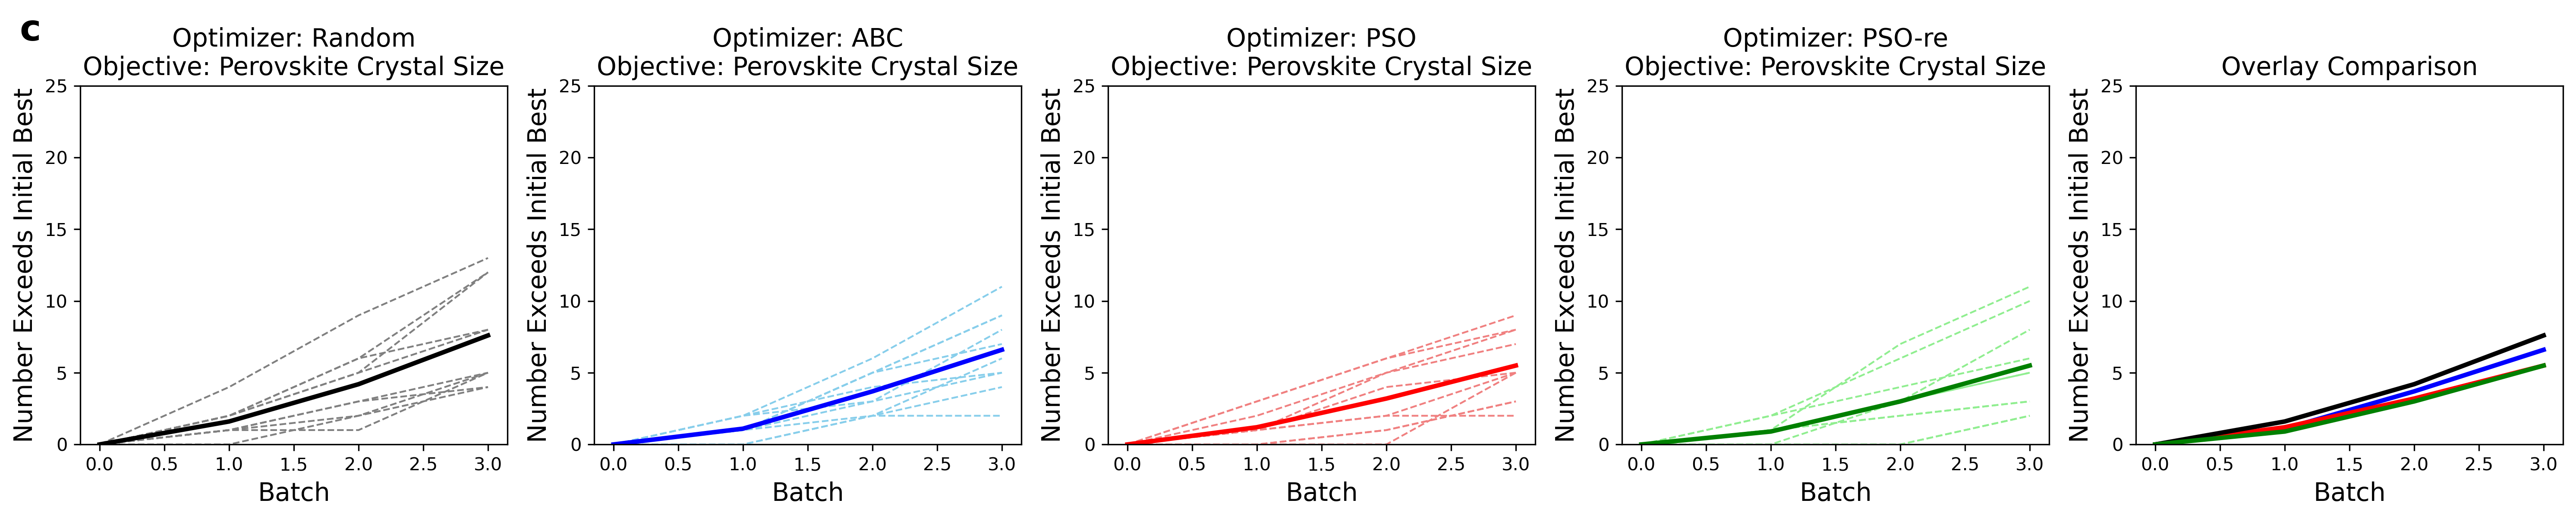

In [6]:
# 5 cycles mean
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

methods = ['ABC','PSO','Random','PSO-re']
seq = {'ABC':1, 'PSO':2,'Random':0, 'PSO-re':3}
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']

color = {'ABC':'skyblue', 'PSO':'lightcoral','Random':'grey', 'PSO-re':'lightgreen'}
colorr = {'ABC':'blue', 'PSO':'red','Random':'black', 'PSO-re':'green'}

#rounds = ['round1', 'round2', 'round3', 'round4', 'round5']
#methods = ['ABC']
eibestnn = {}

fig, axs = plt.subplots(1, 5, figsize=(20, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    eibest = {}
    for roundn in rounds:
        # 讀取 CSV
        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/{method}/{roundn}/cycle3.csv')  # 替換成你的檔案路徑

        # 檢查欄位
        if 'crystal_size' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

        # 分組
        group_size = 10
        groups = [df['crystal_size'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_max = [max(g) for g in groups]
        initial_best = max(groups[0])
        exceeds_initial = []
        ex_init = 0
        for group in groups:
            ex_init += (group > initial_best).sum()
            exceeds_initial.append(ex_init)
        #cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]
        eibest[roundn] = exceeds_initial
        
    eibestnn[method] = eibest    
    # 將所有 list 轉成 numpy array
    all_lists = np.array(list(eibest.values()))  # shape: (5, n)

    # x 軸
    x = np.arange(0, all_lists.shape[1])

    # 畫出每條虛線（較淺的顏色）
    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])

    # 計算平均值並畫出粗線
    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)

    # 加上標籤與圖例

    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Perovskite Crystal Size', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Number Exceeds Initial Best', fontsize = 14)
    axs[seq[method]].set_ylim(0,25)


dict1 = eibestnn['ABC']
dict2 = eibestnn['PSO']
dict3 = eibestnn['Random']
dict4 = eibestnn['PSO-re']

maxn_ABC = np.array([v[-1] for v in dict1.values()])
maxn_PSO = np.array([v[-1] for v in dict2.values()])
maxn_Random = np.array([v[-1] for v in dict3.values()])
maxn_PSO_re = np.array([v[-1] for v in dict4.values()])

# 將 dictionary 轉為 numpy array
arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))
arr4 = np.array(list(dict4.values()))

x = np.arange(0, arr1.shape[1])

# 平均線（深藍色與深紅色）
mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)
mean4 = np.mean(arr4, axis=0)


axs[4].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[4].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[4].plot(x, mean3, color='black', linewidth=2.5, label='Random')
axs[4].plot(x, mean4, color='green', linewidth=2.5, label='PSO-re')

fig.text(0.01, 0.99, 'c', fontsize=20, fontweight='bold',
         va='top', ha='left')

# 加標籤、圖例、標題
plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Number Exceeds Initial Best', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(0,25)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/exib/overall.jpeg')
plt.show()



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

n_batch = 5  # 只看前 4 batch

# ====== 計算每 batch 的 p-value ======
pvals_1vs2 = []
pvals_1vs3 = []

for i in range(n_batch):
    # arr1 vs arr2
    t_stat_12, p_val_12 = ttest_ind(arr3[:, i+1], arr1[:, i+1], equal_var=False)
    pvals_1vs2.append(p_val_12 / 2)
    
    # arr1 vs arr3
    t_stat_13, p_val_13 = ttest_ind(arr3[:, i+1], arr2[:, i+1], equal_var=False)
    pvals_1vs3.append(p_val_13 / 2)

pvals_1vs2 = np.array(pvals_1vs2)
pvals_1vs3 = np.array(pvals_1vs3)

# ====== 繪圖 ======
x = np.arange(1, n_batch + 1)

plt.figure(figsize=(3, 3),dpi = 300)

# 畫兩條線
plt.plot(x, pvals_1vs2, label='ABC < Random', color='blue', marker='o', markersize=4)
plt.plot(x, pvals_1vs3, label='PSO < Random', color='red', marker='s', markersize=4)

# 畫虛線
plt.axhline(0.05, color='red', linestyle='--', linewidth=1)

# 顯示 p < 0.05 的區域（任一組顯著就顯示）
sig_mask = (pvals_1vs2 < 0.05) | (pvals_1vs3 < 0.05)
plt.fill_between(x, 0, 0.05, where=sig_mask, color='gray', alpha=0.2, label='p < 0.05')

plt.xlabel('Batch', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.title('Perovskite Crystal Size', fontsize=12)
plt.ylim(0, 1)
plt.xticks(x)
plt.legend(frameon = False, fontsize = 6, loc='upper left')
plt.tight_layout()
plt.show()


IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
#合併圖片
import os
from PIL import Image

path = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/'

img1 = Image.open(os.path.join(path, 'mean/overall.jpeg'))
img2 = Image.open(os.path.join(path, 'best/overall.jpeg'))
img3 = Image.open(os.path.join(path, 'exib/overall.jpeg'))

# 假設三張圖大小相同，取得寬高
width, height = img1.size

# 建立新圖像，寬度為三倍，垂直高度不變
new_img = Image.new('RGB', (width, height*3))

# 將三張圖貼上去
new_img.paste(img3, (0, 2 * height))
new_img.paste(img2, (0, height))
new_img.paste(img1, (0, 0))

# 儲存或顯示
new_img.save(os.path.join(path, f'combined_final.jpeg'))
new_img.show()




(eog:63786): Gtk-WARNING **: 21:24:10.966: cannot open display: 
